# Gaussian Grid RBM Demo

### Step 1: Load all necessary modules and generate the data

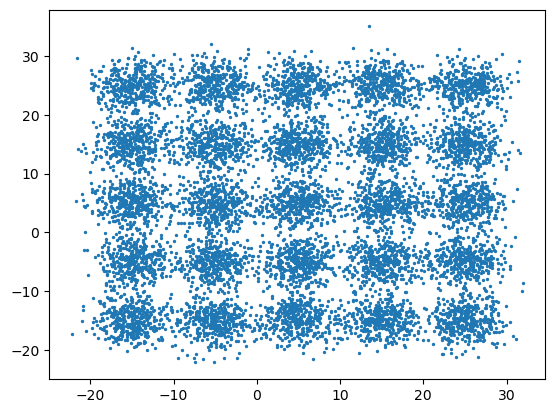

In [1]:
import os, sys
directory_path = os.path.dirname(os.path.abspath("__notebook__"))
sys.path.append('../../')
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from models import rbm

def gaussian_grid(width, height, scale, n_total_samples):
    cov = np.eye(2) * scale
    samples_per_center = int(n_total_samples / (width * height))
    X = []
    for i in range(height):
        for j in range(width):
            mean = np.array([i, j])
            X.append(np.random.multivariate_normal(mean, cov, 
                                                   samples_per_center))
    final = np.vstack(X)
    final[:, 0] -= (height - 1) / 2
    final[:, 1] -= (width - 1) / 2
    return final

X = gaussian_grid(5, 5, 0.05, 10000) * 10 + 5
np.random.shuffle(X)
img = plt.scatter(x=X[:, 0], y=X[:, 1], s=2)

### Step 2: Train the RBM (no adversary)

In [2]:
model = rbm.RBM(
    n_vis=2,
    n_hid=20
)
model.fit_autograd(
    X = X,
    n_gibbs=1,
    lr=0.01,
    n_epochs=400,
    batch_size=50,
    gamma=1,
    rng_seed=0,
    verbose_interval=10,
    checkpoint_path=f'{directory_path}/rbm_checkpoints/rbm_gssn_grid_demo.pth'
)

epoch: 010 of 400 | cd_loss: -0.013 | recon_mse: 423.71 | kl_data_model: 0 | kl_model_data: 0
epoch: 020 of 400 | cd_loss: 0.027 | recon_mse: 429.915 | kl_data_model: 0 | kl_model_data: 0
epoch: 030 of 400 | cd_loss: -0.006 | recon_mse: 390.321 | kl_data_model: 0 | kl_model_data: 0
epoch: 040 of 400 | cd_loss: -0.003 | recon_mse: 421.367 | kl_data_model: 0 | kl_model_data: 0
epoch: 050 of 400 | cd_loss: -0.004 | recon_mse: 403.471 | kl_data_model: 0 | kl_model_data: 0


KeyboardInterrupt: 

### Step 3: Visualize the learned distribution

tensor([4.2442, 4.7048], grad_fn=<ExpBackward0>)


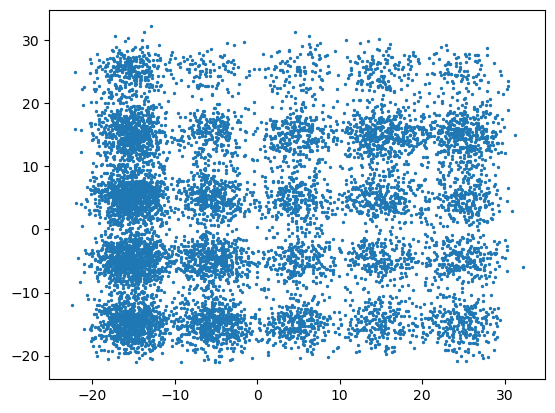

In [3]:
model = rbm.load(f'{directory_path}/rbm_checkpoints/rbm_gssn_grid_demo.pth')
print(model._variance())
samples = model.reconstruct(
    np.zeros((10000, 2)), n_gibbs=200
)
img = plt.scatter(x=samples[:, 0], y=samples[:, 1], s=2)

### Repeat Step 2 for RBM with adversarial training

In [3]:
model_adversarial = rbm.RBM(
    n_vis=2,
    n_hid=20
)
model_adversarial.fit_autograd(
    X=X,
    n_gibbs=1,
    lr=0.01,
    n_epochs=400,
    batch_size=100,
    gamma=0.1,
    gamma_delay=100,
    rng_seed=0,
    verbose_interval=10,
    checkpoint_path=f'{directory_path}/rbm_checkpoints/rbm_gssn_grid_demo_adv.pth'
)

epoch: 010 of 400 | cd_loss: 0.019 | recon_mse: 406.86 | kl_data_model: 0 | kl_model_data: 0
epoch: 020 of 400 | cd_loss: 0.009 | recon_mse: 365.968 | kl_data_model: 0 | kl_model_data: 0
epoch: 030 of 400 | cd_loss: 0.005 | recon_mse: 380.988 | kl_data_model: 0 | kl_model_data: 0
epoch: 040 of 400 | cd_loss: 0.004 | recon_mse: 380.353 | kl_data_model: 0 | kl_model_data: 0
epoch: 050 of 400 | cd_loss: 0.004 | recon_mse: 394.665 | kl_data_model: 0 | kl_model_data: 0
epoch: 060 of 400 | cd_loss: -0.001 | recon_mse: 452.776 | kl_data_model: 0 | kl_model_data: 0
epoch: 070 of 400 | cd_loss: 0.003 | recon_mse: 394.294 | kl_data_model: 0 | kl_model_data: 0
epoch: 080 of 400 | cd_loss: 0.003 | recon_mse: 374.312 | kl_data_model: 0 | kl_model_data: 0
epoch: 090 of 400 | cd_loss: 0.001 | recon_mse: 449.889 | kl_data_model: 0 | kl_model_data: 0
epoch: 100 of 400 | cd_loss: 0.9 | recon_mse: 380.34 | kl_data_model: 0 | kl_model_data: 0
epoch: 110 of 400 | cd_loss: 0.9 | recon_mse: 362.561 | kl_data

KeyboardInterrupt: 

### Repeat Step 3 for RBM adversarial traiing

tensor([4.8692, 4.3518], grad_fn=<ExpBackward0>)


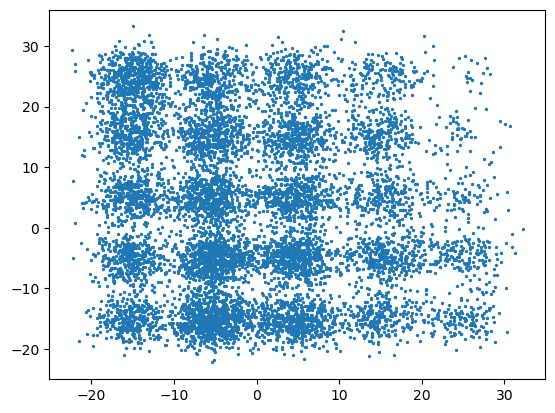

In [5]:
model = rbm.load(f'{directory_path}/rbm_checkpoints/rbm_gssn_grid_demo_adv.pth')
print(model._variance())
samples = model.reconstruct(
    np.zeros((10000, 2)), n_gibbs=200
)
img = plt.scatter(x=samples[:, 0], y=samples[:, 1], s=2)